# Udacity Data Exploration and Preprocessing

## Explore the data

In [1]:
import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random

df = pd.read_csv("driving_log.csv")

In [2]:
df.describe()

,steering,throttle,brake,speed
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.004070,0.869660,0.001970,28.169839
std,0.128840,0.301326,0.036565,6.149327
min,-0.942695,0.000000,0.000000,0.502490
25%,0.000000,0.985533,0.000000,30.183093
50%,0.000000,0.985533,0.000000,30.186400
75%,0.000000,0.985533,0.000000,30.186640
max,1.000000,0.985533,1.000000,30.709360


In [3]:
df.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


frames with zero steering 4361
frames with left steering 1775
frames with right steering 1900
total frames: 8036


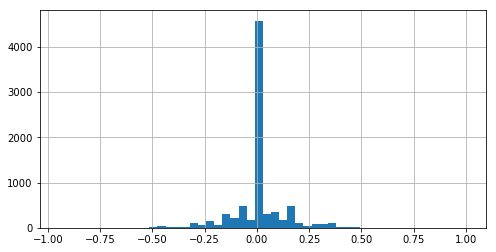

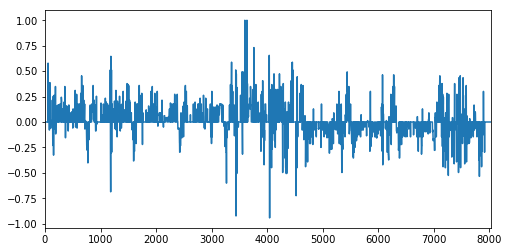

In [4]:
%matplotlib inline

plt.figure(figsize=(8,4))
df.steering.hist(bins=50)

plt.figure(figsize=(8,4))
df.steering.plot()

print("frames with zero steering", df.query('steering == 0')['steering'].count())
print("frames with left steering", df.query('steering < 0')['steering'].count())
print("frames with right steering", df.query('steering > 0')['steering'].count())
print("total frames:", df.steering.count())

## Balance the data

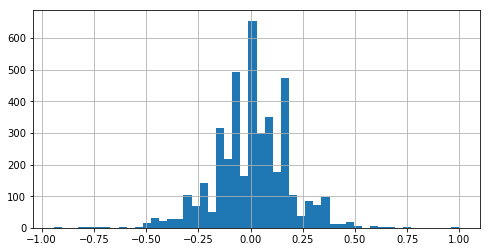

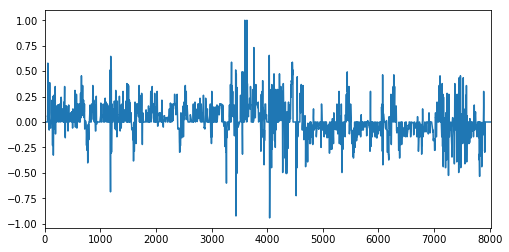

In [5]:
np.random.seed(42)

# drop 90% of the zero steering samples
num_zero_steering = df.query('steering == 0')['steering'].count()
drop_indices = np.random.choice(df.query('steering == 0').index, int(num_zero_steering * 0.9), replace=False)
df = df.drop(drop_indices)

# drop samples close to zero steering
#num_small_steering = df.query('steering > -0.05 and steering < 0.05')['steering'].count()
#drop_indices = np.random.choice(df.query('steering > -0.05 and steering < 0.050').index, int(num_small_steering * 0.5), replace=False)
#df = df.drop(drop_indices)

plt.figure(figsize=(8,4))
df.steering.hist(bins=50)

plt.figure(figsize=(8,4))
df.steering.plot()

In [6]:
# separate the left, right and center image into its own row
CORRECTION = 0.15
samples = []

for index, row in df.iterrows():
    steering_center = float(row.steering)
    steering_left = steering_center + CORRECTION
    steering_right = steering_center - CORRECTION
    img_center = row.center.lstrip()
    img_left = row.left.lstrip()
    img_right = row.right.lstrip()
    
    samples.append([row.center.lstrip(), steering_center])
    samples.append([row.left.lstrip(), steering_left])
    samples.append([row.right.lstrip(), steering_right])

print("samples after separating camera images:", len(samples))

samples after separating camera images: 12336


In [7]:
# flip images
flip_samples = []
for row in samples:
    flip_samples.append(row)
    steering = row[1]
    #if steering != 0:
    path = row[0]
    flip_path = path.replace(".jpg", "_flip.jpg")
    flip_steering = -steering
    flip_samples.append([flip_path, flip_steering])
    if os.path.exists(flip_path) == False:
        image = cv2.imread(path)
        flip_image = np.fliplr(image)
        cv2.imwrite(flip_path, flip_image)

print("samples after flip", len(flip_samples))

samples after flip 24672


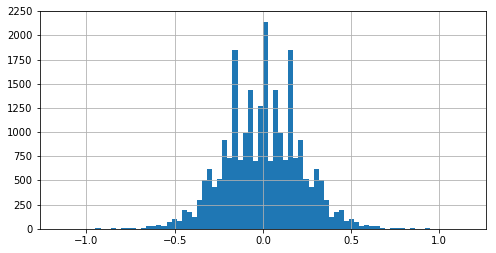

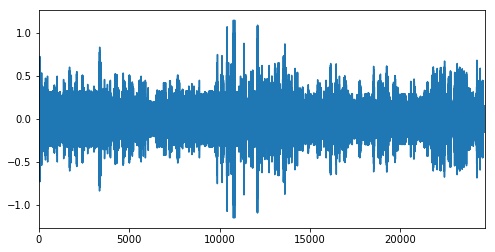

In [8]:
processed_df = pd.DataFrame(flip_samples, columns=['image','steering'])

plt.figure(figsize=(8,4))
processed_df.steering.hist(bins=80)

plt.figure(figsize=(8,4))
processed_df.steering.plot()

In [9]:
# save csv
processed_df.to_csv("processed_driving_log.csv", index=False)

In [ ]:
# explore crop dimension
import matplotlib.image as mpimg
import cv2

list = [1,20,100,1000]

for i in list:
    fig = plt.figure(figsize=(14,7))
    
    img = mpimg.imread("data/" + df['center'].iloc[i])
    ax = fig.add_subplot(2,2,1)
    ax.imshow(img)

    crop1 = img[60:160,0:320]
    ax = fig.add_subplot(2,2,2)
    ax.imshow(crop1)
    
    crop2 = img[0:140,0:320]
    ax = fig.add_subplot(2,2,3)
    ax.imshow(crop2)

    crop3 = img[50:140,0:320]
    #ax = fig.add_subplot(2,2,4)
    #print(crop3.shape)
    #crop3 = cv2.resize(img, (0,0), fx=0.25,fy=0.25)
    #crop3 = crop3[10:76,0:160]
    ax = fig.add_subplot(2,2,4)
    ax.imshow(crop3)
    print(crop3.shape)
    
    

